<h1 style="text-align:center">Titanic Hayatta Kalma Analizi ve Öngörüsü<h1>

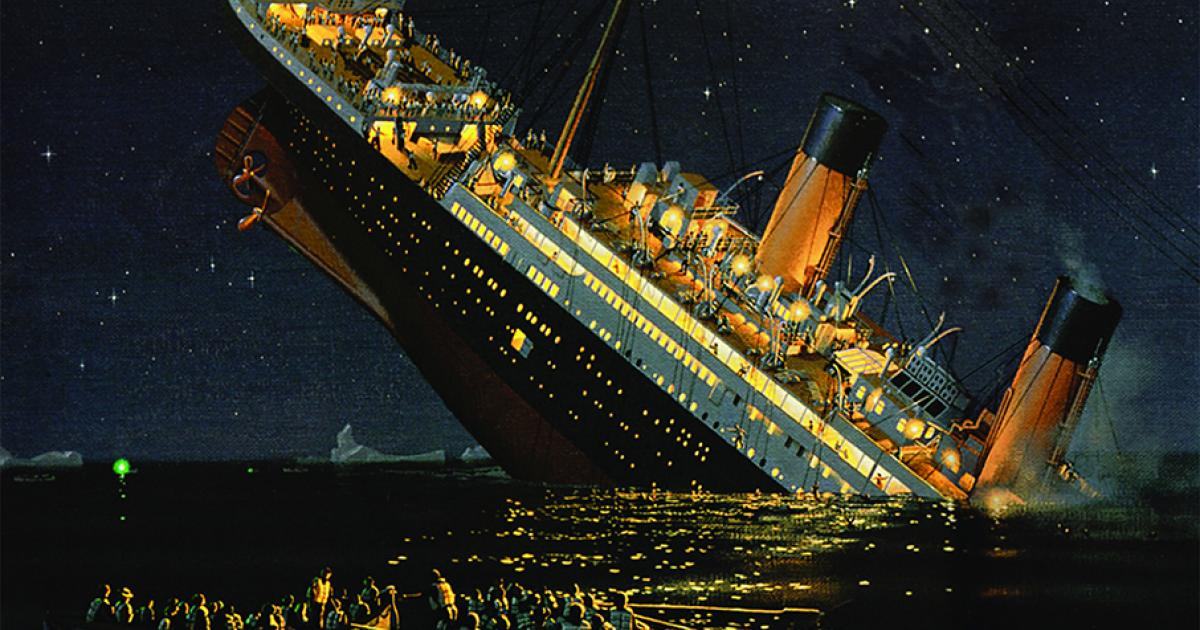

# Projenin Amacı

<p>Bu proje, Titanic gemisinin batışıyla ilgili verileri kullanarak hayatta kalma durumunu makine ögrenmesi modelleri ile  tahmin etmeyi amaçlamaktadır. Projenin ana hedefi, veri analizi ve makine öğrenimi tekniklerini kullanarak, gemide bulunan yolcuların hayatta kalma olasılıklarını belirlemektir. Bu amaç doğrultusunda, veri setindeki çeşitli özellikler (örneğin, cinsiyet, yaş, sınıf vb.) ile hayatta kalma arasındaki ilişkileri keşfetmek için görselleştirmeler ve istatistiksel analizler yaptım. Daha sonra, farklı makine öğrenimi modelleri kullanılarak hayatta kalma durumu tahmin ettim ve bu modellerin performanslarını değerlendirdim.</p>

<h3>Geliştiren : Hüseyin Erol<h3>

Kişisel websitem : https://huseyineroll.com/

Github : https://github.com/HuseyinErol24

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

In [83]:
veri = pd.read_csv("Titanic-Dataset.csv")

In [84]:
veri.columns = ['YolcuID', 'HayattaKalma', 'Sinif','Isim', 'Cinsiyet', 'Yas', 'KardesEsi', 
                'EbeveynCocuk', 'Bilet', 'Ucret', 'Kabin', 
                'BinişLimani']

In [85]:
veri.head()

,YolcuID,HayattaKalma,Sinif,Isim,Cinsiyet,Yas,KardesEsi,EbeveynCocuk,Bilet,Ucret,Kabin,BinişLimani
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
#yaş kolonundaki eksik verileri ortalam ile doldurdum 
ort = veri["Yas"].mean()
veri["Yas"] = veri["Yas"].fillna(ort)

# İsimlerdeki Ünvanları Ayırma ve Yeni Bir Sütuna Eklemek

In [87]:
veri["Unvan"] = veri["Isim"].apply(lambda x: x.split(",")[1].split(".")[0])
#mr missi doctor captan vb ünvanlara sahip kişilerin isismlerinin başında bu bilgiler vardı
#bubilgileri split kullanarak aldım

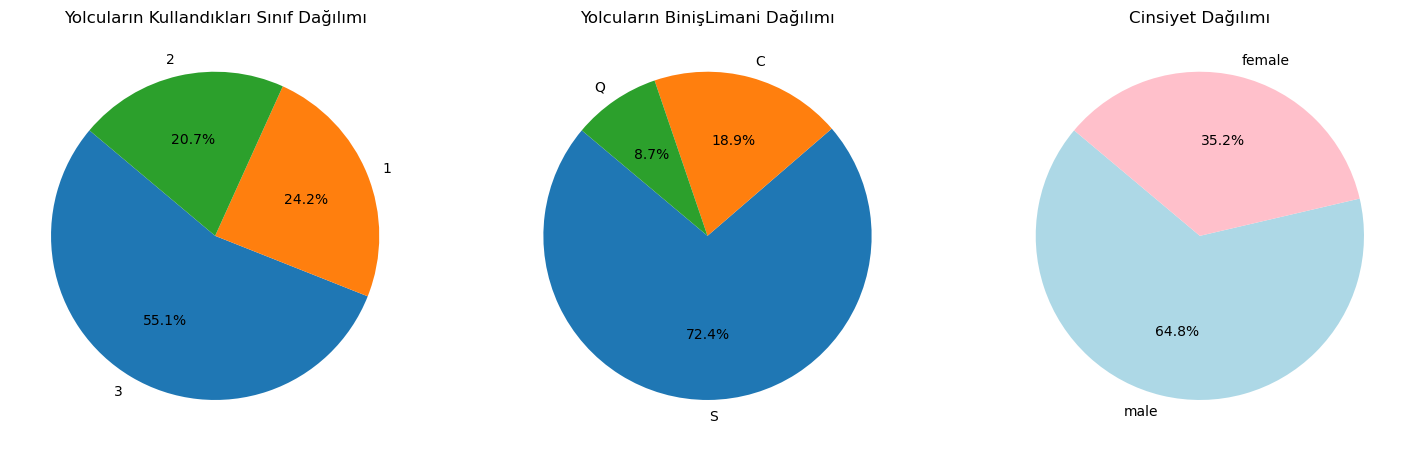

In [88]:
sınıf_Dağilimi = veri["Sinif"].value_counts()
BinişLimani = veri["BinişLimani"].value_counts()
cinsiyet_sayilari = veri['Cinsiyet'].value_counts()
plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1) 
plt.pie(sınıf_Dağilimi, labels=sınıf_Dağilimi.index, autopct='%1.1f%%', startangle=140)
plt.title('Yolcuların Kullandıkları Sınıf Dağılımı')
plt.subplot(1, 3, 2)
plt.pie(BinişLimani, labels=BinişLimani.index, autopct='%1.1f%%', startangle=140)
plt.title('Yolcuların BinişLimani Dağılımı')
plt.subplot(1, 3, 3)
plt.pie(cinsiyet_sayilari, labels=cinsiyet_sayilari.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
plt.title('Cinsiyet Dağılımı')
plt.show()

* Yolcuların büyük çoğunluğu (%55.1) 3. sınıfta seyahat etmiştir. 1. sınıf yolcuları %24.2 ile ikinci sırada yer alırken, 2. sınıf yolcuları %20.7 ile en az yolcu bulunan sınıf olmuştur. Bu, Titanic'te en fazla yolcunun ekonomik sınıfı tercih ettiğini göstermektedir.

* Yolcuların büyük çoğunluğu (%72.4) Southampton limanından (S) biniş yapmıştır. Cherbourg (C) limanı %18.9 ile ikinci sırada gelirken, Queenstown (Q) limanı %8.7 ile en az biniş yapılan limandır. Bu, Titanic'e biniş yapan yolcuların çoğunluğunun Southampton'dan bindiğini gösterir.

* Titanic yolcularının cinsiyet dağılımına baktığımızda, erkek yolcuların %64.8 ile çoğunlukta olduğunu, kadın yolcuların ise %35.2 ile daha az olduğunu görüyoruz. Bu, gemideki erkek yolcu sayısının kadın yolcu sayısına göre daha fazla olduğunu göstermektedir.

<br><br><br><br>

Text(0.5, 1.0, 'Gemideki kişlerin ünvanı')

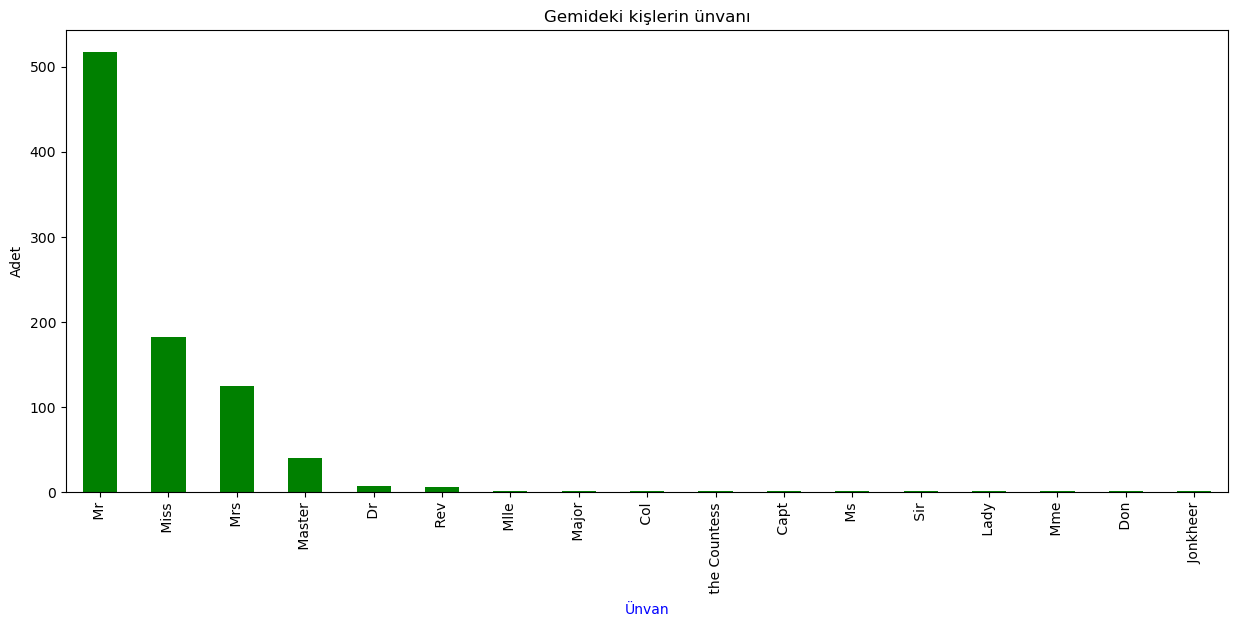

In [89]:
uvan_Dagılımı = veri["Unvan"].value_counts()
plt.figure(figsize=(15, 6))
uvan_Dagılımı.plot(kind='bar', color='GREEN')
plt.xlabel('Ünvan',color="blue")
plt.ylabel('Adet')
plt.title('Gemideki kişlerin ünvanı')

* Grafikte açık ara en yüksek sayıda bulunan unvan "Mr." olmuştur. Bu, gemideki yolcuların büyük bir kısmının erkek olduğunu ve muhtemelen çoğunun yetişkin olduğunu göstermektedir. Erkek yolcuların sayısının fazla olması, genel cinsiyet dağılımındaki erkek çoğunluğuyla da uyumludur.

* "Miss" unvanı, "Mrs." unvanına göre daha fazladır. Bu, gemideki kadın yolcular arasında bekar kadınların evli kadınlara göre daha fazla olduğunu gösterir.

* "Mrs." unvanına sahip yolcular da oldukça fazladır, bu da gemide önemli sayıda evli kadının bulunduğunu gösterir.

* "Master" unvanı genellikle genç erkek çocuklar için kullanılır. Bu, gemide belirli bir sayıda çocuk yolcunun da bulunduğunu gösterir.
<br>

* Diğer unvanlar (Dr., Rev., Mlle, Major, Col, the Countess, Capt., Ms., Sir, Lady, Mme., Don, Jonkheer) çok az sayıda yolcu tarafından taşınmaktadır. Bu unvanlar genellikle özel veya mesleki unvanlardır ve daha az yaygındır.
<br>


* Bu unvanlara sahip kişilerin azlığı, bu tür özel ve mesleki unvanların genel yolcu kitlesi içerisinde daha nadir olduğunu gösterir.

Text(0.5, 1.0, 'Gemideki kişlerin ünvanı')

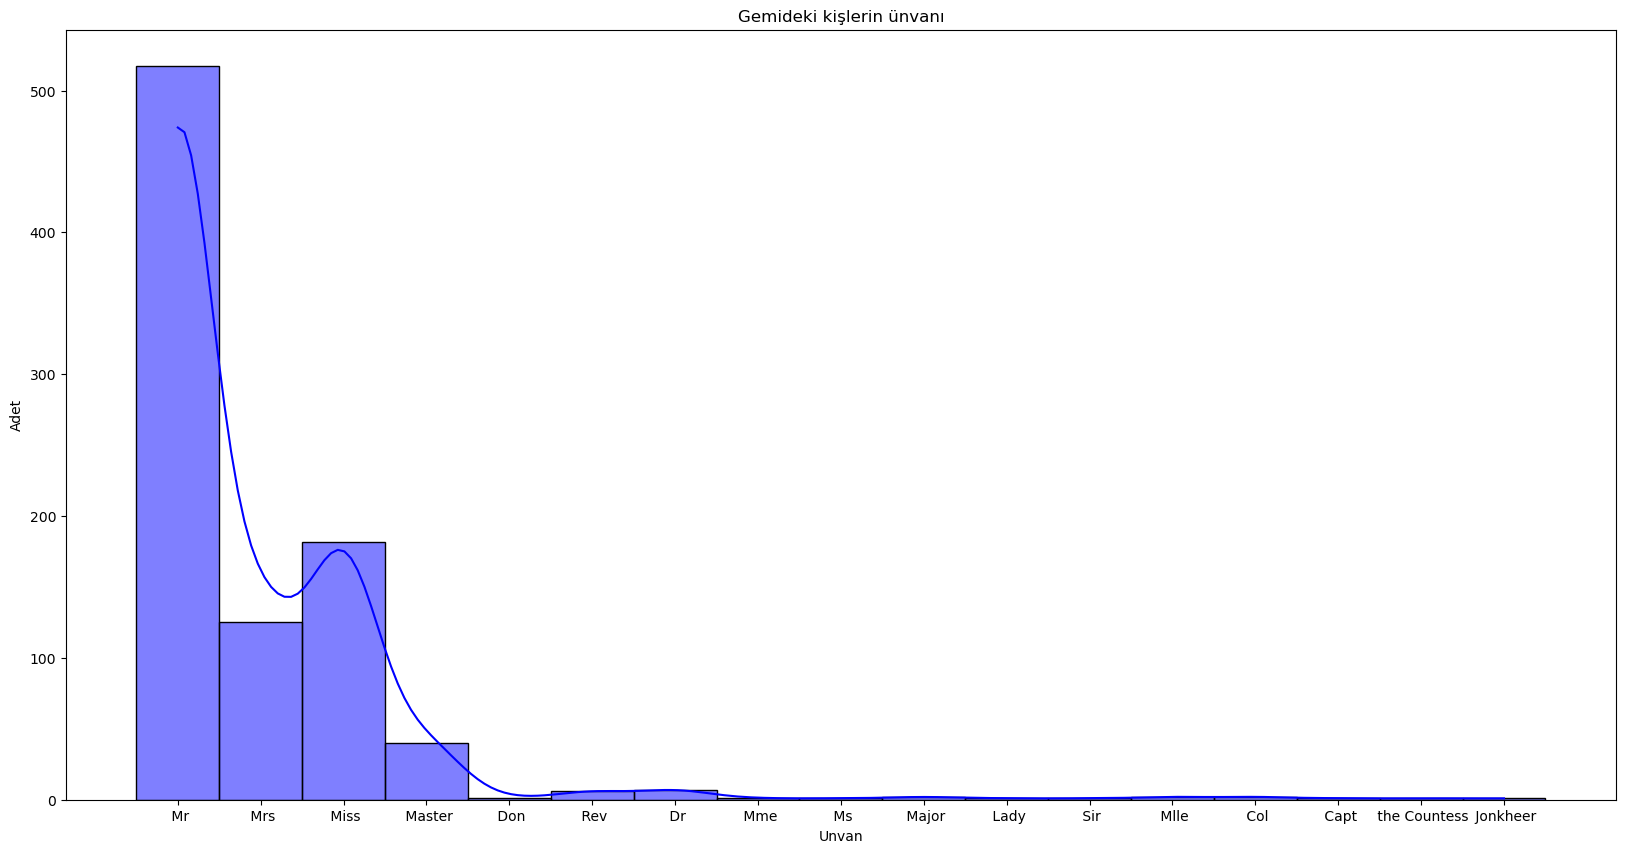

In [90]:
plt.figure(figsize=(20, 10))
sbn.histplot(veri["Unvan"], 
             bins=17, kde=True,color="blue",
             edgecolor='black',label="ünvanı dağılımı")
plt.ylabel('Adet')
plt.title('Gemideki kişlerin ünvanı')

<br><br><br><br><br><br><br><br><br><br><br><br><br>

<br>

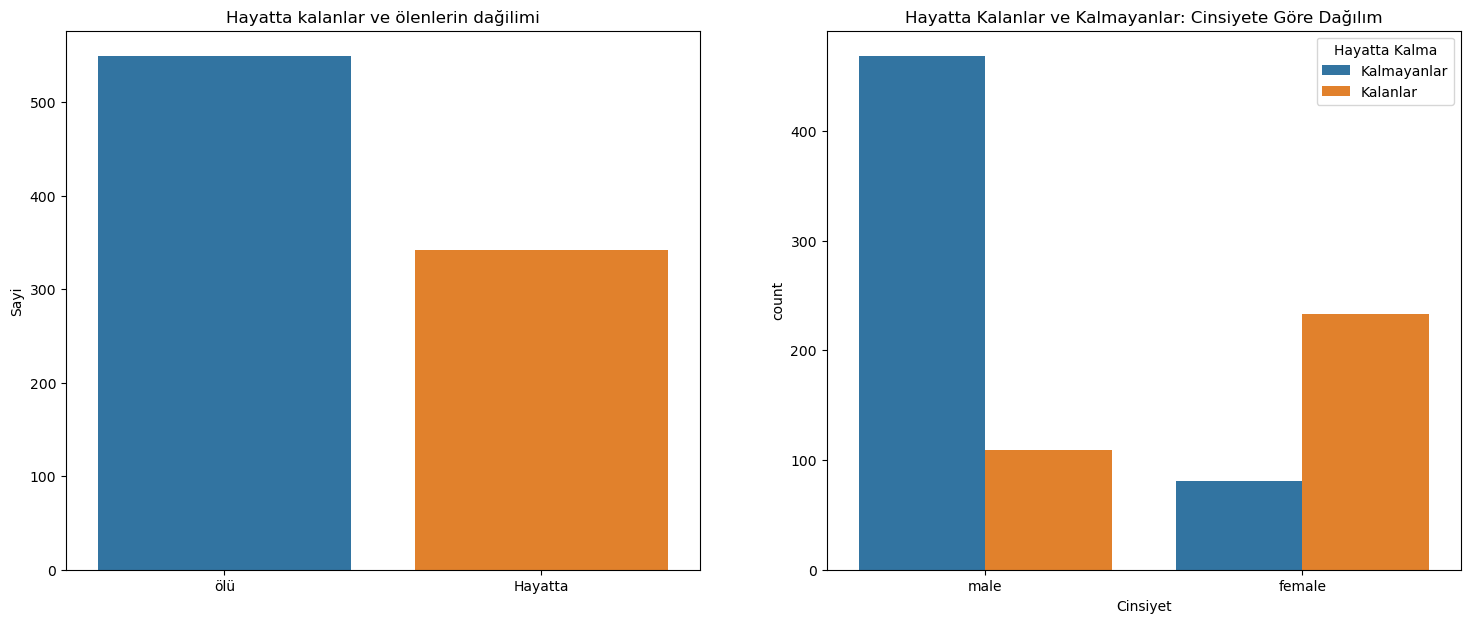

In [91]:
dizi = {1:"Hayatta",0:"ölü"}
plt.figure(figsize=(18, 7))
plt.subplot(1,2,1)
plt.title("Hayatta kalanlar ve ölenlerin dağilimi")
veri["kontrol"] = veri["HayattaKalma"].map(dizi)
sbn.countplot(data=veri,x="kontrol")
plt.xlabel("")
plt.ylabel("Sayi")
plt.subplot(1,2,2)
plt.title('Hayatta Kalanlar ve Kalmayanlar: Cinsiyete Göre Dağılım')
sbn.countplot(data=veri,x="Cinsiyet",hue="HayattaKalma")
plt.legend(title='Hayatta Kalma', labels=['Kalmayanlar', 'Kalanlar'])

* Kazadan ölenlerin sayısı hayatta kalanlardan çok daha fazladır.

* Erkeklerin hayatta kalma oranı kadınlardan çok daha düşüktür.

In [92]:
toplam_erkek_adedi = len(veri.loc[veri["Cinsiyet"] == "male"])
hayatta_kalan_erkek_adedi = len(veri[(veri["Cinsiyet"] == "male") & (veri["HayattaKalma"] == 1)])
erkek_hayatta_kalma_orani = (hayatta_kalan_erkek_adedi / toplam_erkek_adedi) * 100
print("Erkeklerin hayatta kalma oranı: {:.2f}%".format(erkek_hayatta_kalma_orani))

Erkeklerin hayatta kalma oranı: 18.89%


In [93]:
toplam_erkek_adedi = len(veri.loc[veri["Cinsiyet"] == "female"])
hayatta_kalan_erkek_adedi = len(veri[(veri["Cinsiyet"] == "female") & (veri["HayattaKalma"] == 1)])
erkek_hayatta_kalma_orani = (hayatta_kalan_erkek_adedi / toplam_erkek_adedi) * 100
print("Kadınların hayatta kalma oranı: {:.2f}%".format(erkek_hayatta_kalma_orani))

Kadınların hayatta kalma oranı: 74.20%


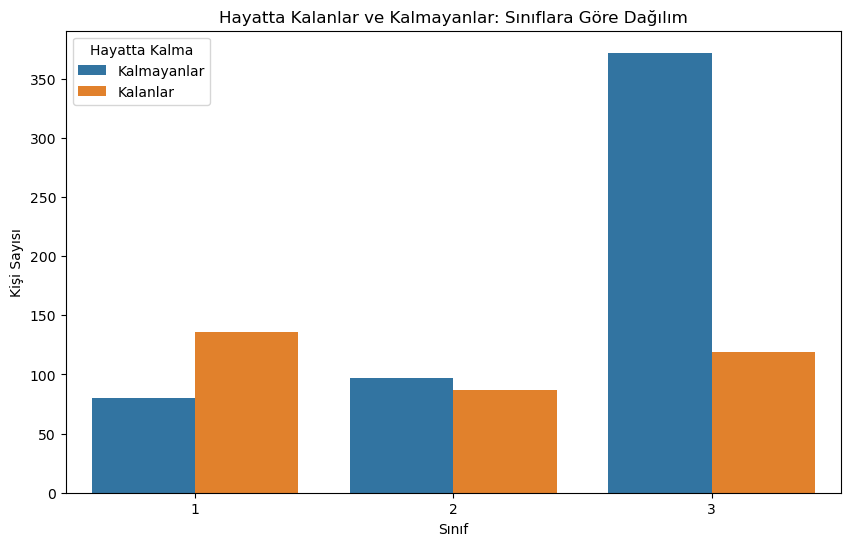

In [94]:
plt.figure(figsize=(10, 6))
sbn.countplot(data=veri, x='Sinif', hue='HayattaKalma')
plt.title('Hayatta Kalanlar ve Kalmayanlar: Sınıflara Göre Dağılım')
plt.xlabel('Sınıf')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hayatta Kalma', labels=['Kalmayanlar', 'Kalanlar'])

* Sınıf 1, en yüksek hayatta kalan oranına sahiptir. Grafiğin sol tarafındaki yükseklik, Sınıf 1'deki hayatta kalanların sayısının diğer sınıflara kıyasla önemli ölçüde daha fazla olduğunu gösterir. Bu, Sınıf 1'deki yolcuların daha fazla imkana ve daha iyi yaşam koşullarına sahip olduğunu ve bu nedenle hayatta kalma şanslarının daha yüksek olduğunu gösterir.

* Sınıf 3, en düşük hayatta kalan oranına sahiptir. Grafiğin sağ tarafındaki düşük yükseklik, Sınıf 3'teki hayatta kalanların sayısının diğer sınıflara kıyasla oldukça az olduğunu gösterir. Bu, Sınıf 3'teki yolcuların daha az imkana ve daha kötü yaşam koşullarına sahip olduğunu ve bu nedenle hayatta kalma şanslarının daha düşük olduğunu gösterir.

*  Sınıf 2'nin hayatta kalan oranı Sınıf 1 ve Sınıf 3'ün arasında yer alır. Grafiğin ortasındaki orta yükseklik, Sınıf 2'deki hayatta kalanların sayısının Sınıf 1'den daha az ve Sınıf 3'ten daha fazla olduğunu gösterir. Bu, Sınıf 2'deki yolcuların Sınıf 1'dekilere kıyasla daha az imkana ve daha kötü yaşam koşullarına sahip olduğunu, ancak Sınıf 3'tekilere kıyasla daha fazla imkana ve daha iyi yaşam koşullarına sahip olduğunu gösterir.

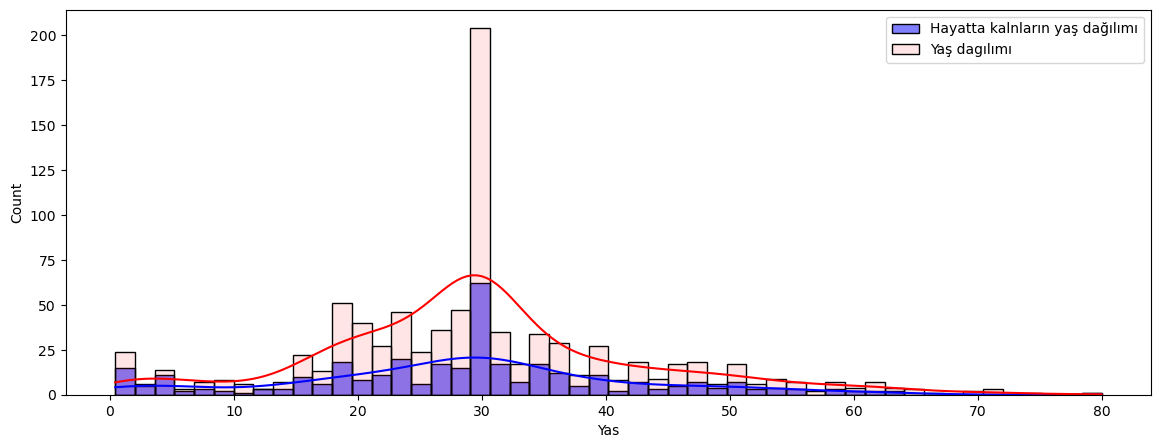

In [95]:
plt.figure(figsize=(14,5))
sbn.histplot(veri.loc[veri["HayattaKalma"]==1]["Yas"], 
             bins=50, kde=True,color="blue",
             edgecolor='black',label="Hayatta kalnların yaş dağılımı")
sbn.histplot(veri["Yas"], bins=50, kde=True,
             color="red",edgecolor='black',
             alpha=0.1,label="Yaş dagılımı")
plt.legend()

* Hayatta kalanların ortalama yaşı ölenlerden daha düşüktür. Bu durum, grafiğin sol tarafındaki hayatta kalanlar için daha yüksek çubuklarla gösterilmektedir. Bu, daha genç insanların hayatta kalma şansının daha yüksek olduğunu gösterir.

* Çocuklar (0-16 yaş arası) en yüksek hayatta kalma oranına sahiptir. Grafiğin en sol tarafındaki en yüksek çubuk, bu yaş grubundaki hayatta kalanların sayısının diğer yaş gruplarına kıyasla önemli ölçüde daha fazla olduğunu gösterir. Bu, çocukların daha az savunmasız olduğunu ve acil durumlarda daha kolay korunabildiğini gösterir.

<br>

Text(0, 0.5, 'Yaş')

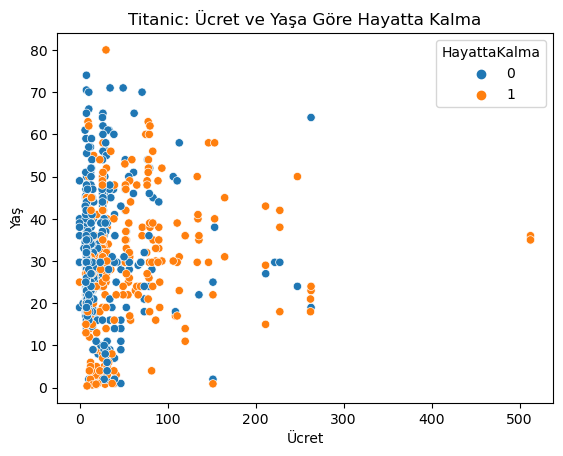

In [96]:
sbn.scatterplot(data=veri, x="Ucret", y="Yas", hue="HayattaKalma")
plt.title("Titanic: Ücret ve Yaşa Göre Hayatta Kalma")
plt.xlabel("Ücret")
plt.ylabel("Yaş")

* Genç yolcuların ve yüksek ücret ödeyen yolcuların hayatta kalma şansı daha yüksektir.

* Yaşlı yolcuların ve düşük ücret ödeyen yolcuların hayatta kalma şansı daha düşüktür.

<br>

In [97]:
label_encoder = LabelEncoder() #string ifadelerin sayısal veriye çevrilmesini sağlar
scaler = MinMaxScaler()

In [98]:
veri["Cinsiyet1"] = label_encoder.fit_transform(veri["Cinsiyet"])
veri["BinişLimani1"] = label_encoder.fit_transform(veri["BinişLimani"])

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Veri Setindeki Belirli Özellikler Arasındaki Korelasyon Haritası

<Axes: >

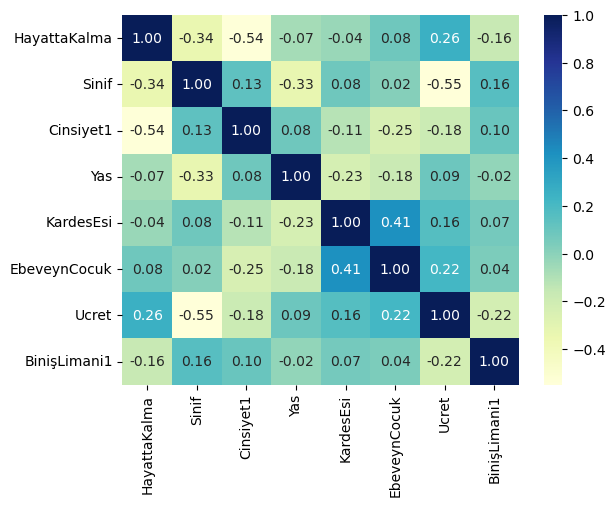

In [18]:
corr = veri[["HayattaKalma","Sinif","Cinsiyet1","Yas","KardesEsi","EbeveynCocuk","Ucret","BinişLimani1"]].corr()
sbn.heatmap(corr, cmap = "YlGnBu", annot=True, fmt=".2f")

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Hayatta Kalma ile Diğer Özellikler Arasındaki Korelasyonun 

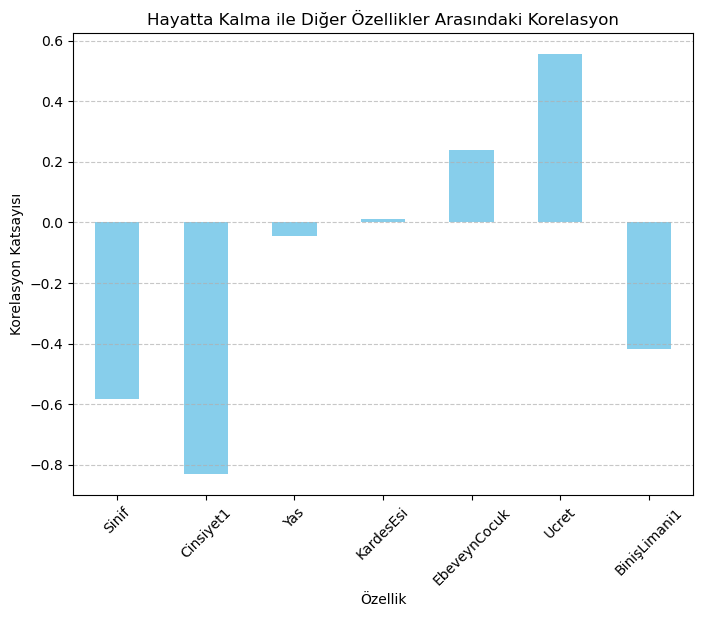

In [19]:
corr_matrix = corr.corr()["HayattaKalma"].drop("HayattaKalma")
plt.figure(figsize=(8, 6))
corr_matrix.plot(kind="bar", color="skyblue")
plt.title("Hayatta Kalma ile Diğer Özellikler Arasındaki Korelasyon")
plt.xlabel("Özellik")
plt.ylabel("Korelasyon Katsayısı")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [20]:
veri.drop(columns=["Isim","Bilet","Kabin","kontrol","Cinsiyet1","BinişLimani1"],inplace=True)
#gereksiz veriler silinmiştir

In [21]:
veri.head()

,YolcuID,HayattaKalma,Sinif,Cinsiyet,Yas,KardesEsi,EbeveynCocuk,Ucret,BinişLimani,Unvan
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [22]:
# Cinsiyet ve  Unvan kolonları  label_encoder yapılmıştır
veri["Cinsiyet"] = label_encoder.fit_transform(veri["Cinsiyet"])
liman = pd.get_dummies(veri["BinişLimani"]).astype(int)
veri["Unvan"]= label_encoder.fit_transform(veri["Unvan"])
veri = pd.concat([veri, liman], axis=1)

In [23]:
veri.drop(columns=["YolcuID","BinişLimani"],inplace=True)

In [24]:
#MinMaxScaler yapılarak veriler 0-1 arsasına getirilmiştir 
veri[['Yas', 'Ucret',"Sinif","Unvan"]] = scaler.fit_transform(veri[['Yas', 'Ucret',"Sinif","Unvan"]])

In [25]:
veri.head()

,HayattaKalma,Sinif,Cinsiyet,Yas,KardesEsi,EbeveynCocuk,Ucret,Unvan,C,Q,S
0,0,1.0,1,0.271174,1,0,0.014151,0.6875,0,0,1
1,1,0.0,0,0.472229,1,0,0.139136,0.7500,1,0,0
2,1,1.0,0,0.321438,0,0,0.015469,0.5000,0,0,1
3,1,0.0,0,0.434531,1,0,0.103644,0.7500,0,0,1
4,0,1.0,1,0.434531,0,0,0.015713,0.6875,0,0,1


In [26]:
x_değerleri = veri.drop(columns=["HayattaKalma"])
x_değerleri = x_değerleri.values
y_değeri = veri["HayattaKalma"].values

In [79]:
veri.head() #egitilmeye hazır veri setimiz

,HayattaKalma,Sinif,Cinsiyet,Yas,KardesEsi,EbeveynCocuk,Ucret,Unvan,C,Q,S
0,0,1.0,1,0.271174,1,0,0.014151,0.6875,0,0,1
1,1,0.0,0,0.472229,1,0,0.139136,0.7500,1,0,0
2,1,1.0,0,0.321438,0,0,0.015469,0.5000,0,0,1
3,1,0.0,0,0.434531,1,0,0.103644,0.7500,0,0,1
4,0,1.0,1,0.434531,0,0,0.015713,0.6875,0,0,1


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_değerleri,y_değeri,test_size=0.2,random_state=14)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Sınıflandırma Algoritmalarının Performansının ROC Eğrileriyle İncelenmesi

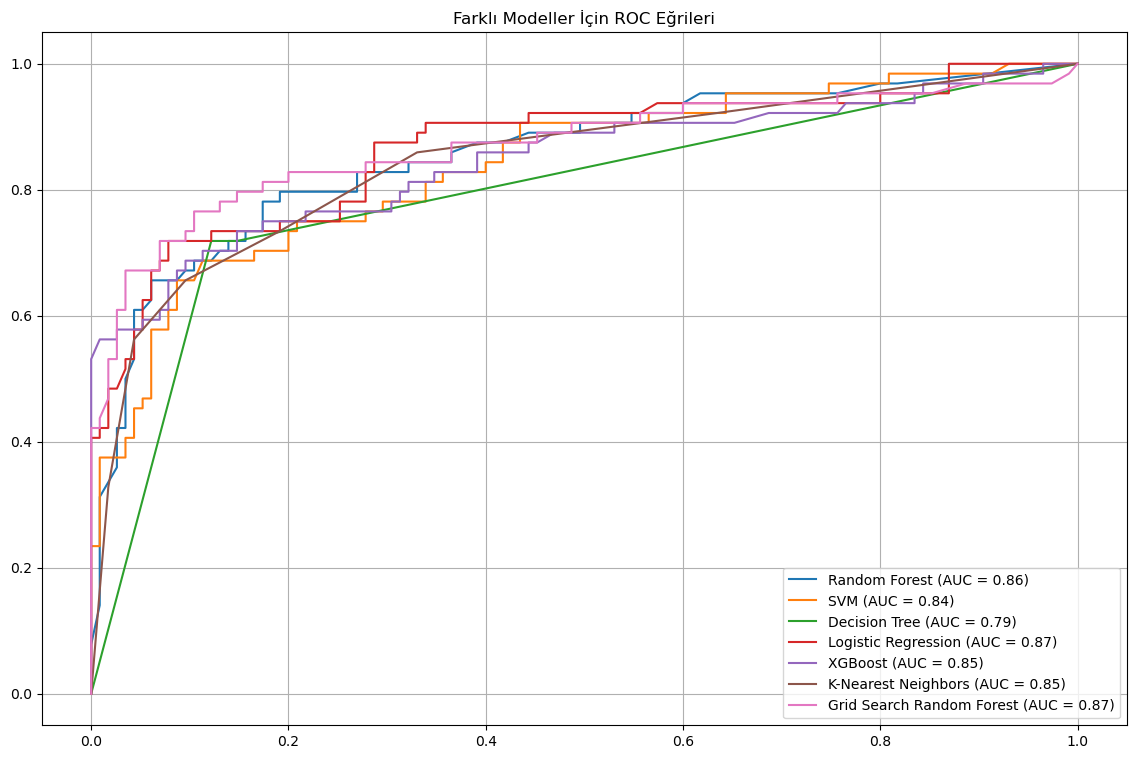

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, rf_pred)
print("Test seti doğruluğu:", accuracy)
cm = confusion_matrix(y_test, rf_pred);
print("Confusion Matrix : ")
print(cm) #gridsearch yapılmadan önce 

Test seti doğruluğu: 0.8044692737430168
Confusion Matrix : 
[[98 17]
 [18 46]]


In [30]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, rf_pred))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       115
           1       0.73      0.72      0.72        64

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# SVC

In [35]:
svm_model = SVC(probability=True ,kernel='linear')
svm_model.fit(x_train, y_train)
svm_tahmin= svm_model.predict(x_test)

In [36]:
conf_matrix = confusion_matrix(y_test, svm_tahmin)
print("Confusion Matrix : ")
print(conf_matrix)

Confusion Matrix : 
[[96 19]
 [19 45]]


In [37]:
accuracy = accuracy_score(y_test,svm_tahmin)
print("Test seti doğruluğu:", accuracy) 

Test seti doğruluğu: 0.7877094972067039


In [38]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, svm_tahmin))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       115
           1       0.70      0.70      0.70        64

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



# DecisionTreeClassifier

In [61]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
tahmin_dec = dec.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test,tahmin_dec)
print("Test seti doğruluğu: ", accuracy)

Test seti doğruluğu:  0.8212290502793296


In [64]:
conf_matrix = confusion_matrix(y_test, tahmin_dec)
print("Confusion Matrix : ")
print(conf_matrix)

Confusion Matrix : 
[[101  14]
 [ 18  46]]


In [65]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, tahmin_dec))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       115
           1       0.77      0.72      0.74        64

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



# LogisticRegression

In [66]:
log = LogisticRegression(max_iter=1000)
log.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [67]:
log_test = log.predict(x_test)

In [68]:
conf_matrix = confusion_matrix(y_test, log_test)
accuracy = accuracy_score(y_test, log_test)

print("Confusion Matrix:")
print(conf_matrix)
print("Test seti doğruluğu: ", accuracy)

Confusion Matrix:
[[100  15]
 [ 17  47]]
Test seti doğruluğu:  0.8212290502793296


In [69]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, log_test))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       115
           1       0.76      0.73      0.75        64

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



# XGBClassifier

In [70]:
xgb_model = XGBClassifier(random_state=21)
xgb_model.fit(x_train,y_train)
model_tahmini_xgb = xgb_model.predict(x_test)

In [71]:
conf_matrix = confusion_matrix(y_test, model_tahmini_xgb)
accuracy = accuracy_score(y_test, model_tahmini_xgb)

print("Confusion Matrix:")
print(conf_matrix)
print("Test seti doğruluğu: ", accuracy)

Confusion Matrix:
[[102  13]
 [ 20  44]]
Test seti doğruluğu:  0.8156424581005587


In [72]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, model_tahmini_xgb))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       115
           1       0.77      0.69      0.73        64

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179



# KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=6)  
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, knn_y_pred)
print("Test seti doğruluğu: ",accuracy)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, knn_y_pred))


Test seti doğruluğu:  0.8156424581005587
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       115
           1       0.79      0.66      0.72        64

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179



In [74]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, knn_y_pred))

Confusion Matrix: 
[[104  11]
 [ 22  42]]


In [75]:
from sklearn.model_selection import GridSearchCV
parametreler = {
    'n_estimators': [10, 100,1000],
    'max_depth': [15,20,40,80,90],
    'max_features' :[0.5,1,2,3],
    'min_samples_split': [8, 10,12],
    'min_samples_leaf': [ 5,10,15],
    'criterion' : ['gini', 'entropy'],
    'bootstrap': [True]
}
grid_model = GridSearchCV(estimator=rf_model, param_grid=parametreler, cv=5, scoring='accuracy', verbose=2)
grid_model.fit(x_train, y_train)
print("En iyi parametreler:", grid_model.best_params_)
print("En iyi skor:", grid_model.best_score_)
en_iyi_model = grid_model.best_estimator_
y_pred = en_iyi_model.predict(x_test)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_sample

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=0.5, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=5, min_sam

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=1, min_samples_leaf=15, min_sa

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=5, min_sam

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=2, min_samples_leaf=10, 

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_sp

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=10, m

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=3, min_samples_leaf=15, 

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=0.5, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=5, min_

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=1, min_samples_leaf=10, 

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_s

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=10, 

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=2, min_samples_leaf=15, 

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=10, min_sam

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=3, min_samples_leaf=15, m

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=0.5, min_samples_leaf=1

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=5, min_samples

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=10, 

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=1, min_samples_leaf=15, 

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=10, min_sa

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=2, min_samples_leaf=15, 

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=5, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=40, max_features=3, min_samples_leaf=15, min_sa

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_l

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_sa

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=10, min_sa

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=1, min_samples_leaf=15, 

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_sam

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=15, min_sa

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=5, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=3, min_samples_leaf=10, 

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=5, 

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=0.5, min_

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=5, min_sam

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=1, min_samples_leaf=15, min_sa

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=5, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=2, min_samples_leaf=10, 

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_sp

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=10, m

[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=3, min_samples_leaf=15, 

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_feature

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_featur

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=1, 

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_l

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=2

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=3, min_samples

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_f

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_feat

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=1, min_sa

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_sa

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=2

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=3, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_fea

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_f

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samp

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=1, 

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=2, min_samples

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_sampl

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, 

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=3, m

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=10, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=0.5, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_featu

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_sa

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=1, 

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_l

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=3, min_samples

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_f

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=0.5, min_samples_leaf=15, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_feat

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=1, min_sa

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=10, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_sa

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2, min_samples_leaf=15, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=2

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=90, max_features=3, min_sam

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print("Test seti doğruluğu:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Test seti doğruluğu: 0.8379888268156425
Confusion Matrix: 
[[104  11]
 [ 18  46]]


In [77]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       115
           1       0.81      0.72      0.76        64

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



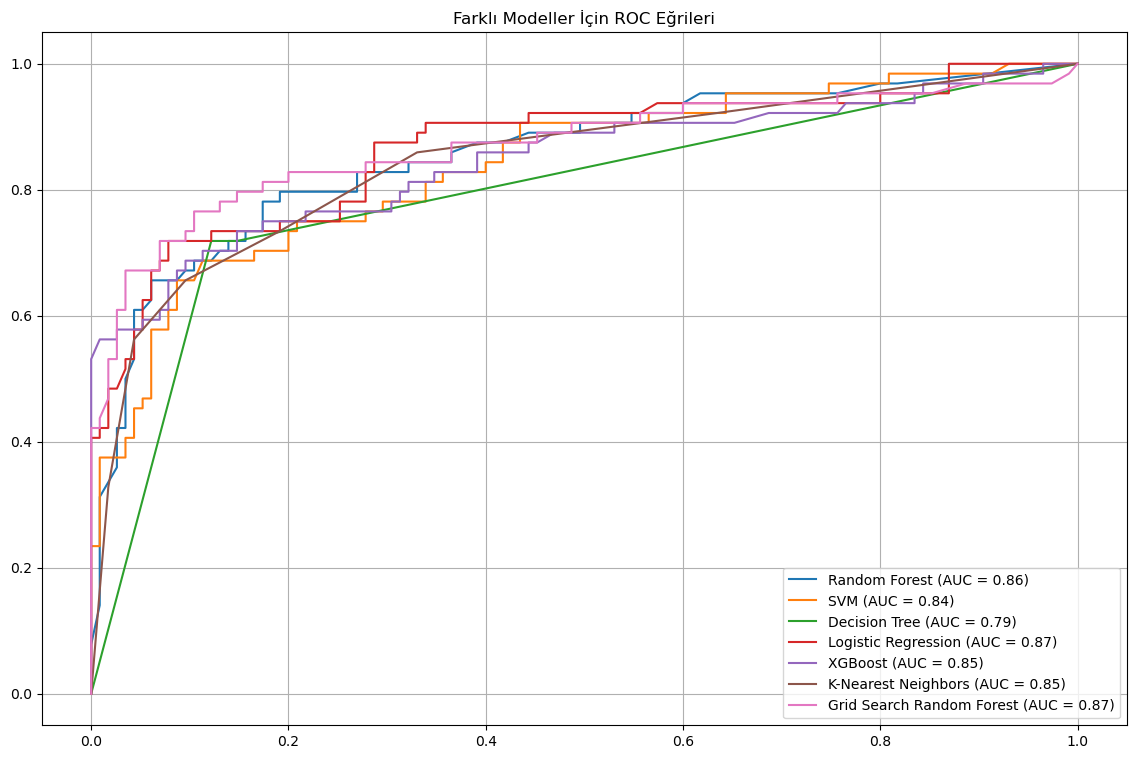

In [78]:
plt.figure(figsize=(14, 9))

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(x_test)[:, 1])
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(x_test)[:, 1])
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

fpr_dec, tpr_dec, _ = roc_curve(y_test, dec.predict_proba(x_test)[:, 1])
roc_auc_dec = roc_auc_score(y_test, dec.predict_proba(x_test)[:, 1])
plt.plot(fpr_dec, tpr_dec, label=f'Decision Tree (AUC = {roc_auc_dec:.2f})')

fpr_log, tpr_log, _ = roc_curve(y_test, log.predict_proba(x_test)[:, 1])
roc_auc_log = roc_auc_score(y_test, log.predict_proba(x_test)[:, 1])
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(x_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(x_test)[:, 1])
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1])
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

fpr_grid, tpr_grid, _ = roc_curve(y_test, grid_model.predict_proba(x_test)[:, 1])
roc_auc_grid = roc_auc_score(y_test, grid_model.predict_proba(x_test)[:, 1])
plt.plot(fpr_grid, tpr_grid, label=f'Grid Search Random Forest (AUC = {roc_auc_grid:.2f})')

plt.title('Farklı Modeller İçin ROC Eğrileri')
plt.legend()
plt.grid(True)